<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [1]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Make predictions using ready made model (without any training)**

In [3]:
IMAGE_SHAPE = (224, 224)
#its a complete model, feature_extarction + classification 
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

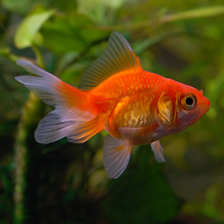

In [4]:
gold_fish = Image.open("./0 resources/datasets/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...].shape

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("./0 resources/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Load flowers dataset</h3>

In [11]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [12]:
import pathlib
data_dir=pathlib.Path("./0 resources/datasets/flower_photos")

In [13]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('0 resources/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('0 resources/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

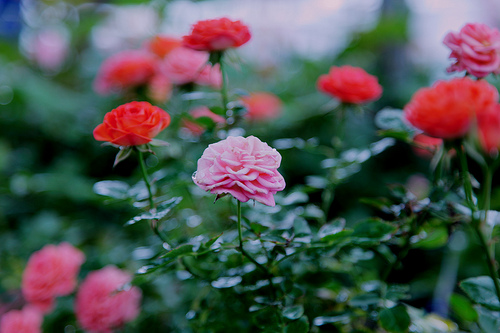

In [17]:
Image.open(str(roses[1]))

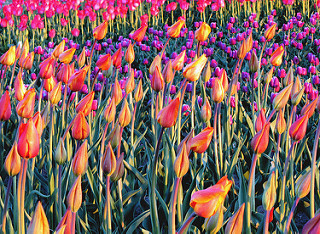

In [19]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [20]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [21]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [22]:
flowers_images_dict['roses'][:5]

[PosixPath('0 resources/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [23]:
str(flowers_images_dict['roses'][0])

'0 resources/datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [25]:
img.shape

(243, 500, 3)

In [26]:
cv2.resize(img,(224,224)).shape 

(224, 224, 3)

**Resizing the image**

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [31]:
X[0].shape

(224, 224, 3)

In [32]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [33]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

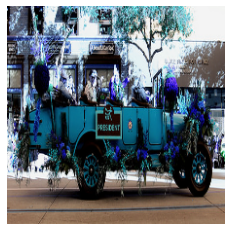

In [34]:
plt.axis('off')
plt.imshow(X[0])

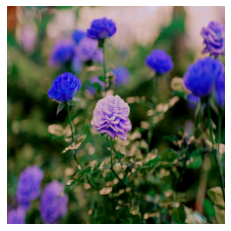

In [35]:
plt.axis('off')
plt.imshow(X[1])

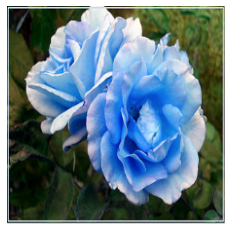

In [36]:
plt.axis('off')
plt.imshow(X[2])

In [37]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 722])

In [44]:
image_labels[795], image_labels[722]

('shower curtain', 'pillow')

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

In [39]:
#here its a feature extraction model, we will do the classification part manually for flower data set
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [40]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 71s 831ms/step - loss: 0.7931 - acc: 0.7064
Epoch 2/5
86/86 [==============================] - 65s 759ms/step - loss: 0.4068 - acc: 0.8623
Epoch 3/5
86/86 [==============================] - 68s 785ms/step - loss: 0.3176 - acc: 0.8943
Epoch 4/5
86/86 [==============================] - 69s 803ms/step - loss: 0.2653 - acc: 0.9172
Epoch 5/5
86/86 [==============================] - 71s 821ms/step - loss: 0.2263 - acc: 0.9270


In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 781ms/step - loss: 0.3729 - acc: 0.8736


[0.37286198139190674, 0.8736383318901062]